<a href="https://colab.research.google.com/github/LidiyaIshchenko/Project-4/blob/main/Lidiya_Ishchenko_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = ':https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F4373687%2F7509655%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240213%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240213T122001Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D8efd0d6e6fc038172954c47327d6d3835e0a4a01bbf32a0a5ed2637a64976e45d34fe1bbdec33c25c58bab05b3da313f19ef1e23d9eb1b5b84a78600e6c0452c3420d9337c75b38578cdfe321bd49015fdab0bebeb32b390a27ec0979208e4bd91d8b0d6d2bf3e77b5c9a46a20acf4c43ef52eb32064d114356f2c9f48c08def1cf030f6630886a9d6598b586888b5df02759ced620557ddda92ca8cbaeba280d3c114c52271cbb8fec6d452772401a9fe57e140e2eb75c8a1d96a962e947a9db724973827050d1d79a707137f30b5c8ce2981e05fb47f200712b8a418eda2b732e269abce616941ea6d70be301e944ed4f34621c4bee643ec3a4c4ba9d44cfb'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 150481049 bytes downloaded
Downloaded and uncompressed: 
Data source import complete.


<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Комментарий ревьюера</b>


Привет, Лидия! Давай знакомиться! Меня зовут Дмитрий Махортов, и я буду проверять твой проект. Сразу предлагаю общение на «ты» 🙂, но если тебе это не комфортно, то дай знать, и мы перейдем на «вы».

Моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе погрузиться в увлекательный мир работы с данными и вырасти в крепкого профи. Это отдаленная цель. А ближайшая - сделать твою работу еще лучше )).
   
    
Все ключевые этапы в работе выполнены, и я вижу что с проектом ты справшяешься. Есть моменты, которые нужно доработать, но я уверен, у тебя все получится.
        
Расскажу как обычно проходит проверка:    
Бывают моменты, которые требуют пристального внимания. Комментарии по ним выделены <span style='background-color:#F7B3A4'> красным цветом </span> и обозначены значком 🛑. После их доработки проект будет принят.  🙂

<span style='background-color:#B7EBA7'> Зеленым цветом </span> и значком ✅ отмечены удачные и элегантные решения, на которые можно опираться в будущих проектах. Или советы «со звездочкой», которые помогут тебе в будущем.

<span style='background-color:#F9EDA6'>Жёлтым цветом </span> и значком ⚠️ выделено то, что в следующий раз можно сделать по-другому. Ты можешь учесть эти комментарии при выполнении будущих заданий или доработать проект сейчас (однако это не обязательно).

Давай работать над проектом в диалоге: **если ты что-то меняешь в проекте по моим рекомендациям — пиши об этом**. Выбери для своих комментариев какой-то заметный цвет, так мне будет легче отследить изменения. Пожалуйста, **не перемещай, не изменяй и не удаляй мои комментарии**. Всё это поможет выполнить повторную проверку твоего проекта оперативнее.
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>образец комментария студента</b></font>
   
Можешь использовать этот комментарий. Просто удали этот текст и вместо него напиши свой 🙂

</div>

<a href="https://colab.research.google.com/github/LidiyaIshchenko/Project-4/blob/main/Copy_of_computer_vision%20v_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Комментарий ревьюера</b>

Скажу честно - я немного удивлен от "коктейля"... Вижу ты и на каггле отметилась, и в колабе этот ноутбук побывал, ну и через GIT отправлен на проверку.

Зачем же так сложно? Могу только предполжить, что в Колабе не хватило ресурса использования GPU?
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Комментарий студента</b></font>
   
Привет, да, изначально планировала всё делать в кегле, но там что-то не заладилось, то работает, то нет... то медленно, то быстро, перешла в колаб, тут всё удобно быстро и чудесно, но  есть один минус, не знаешь, в какой момент бесплатное счастье закончится, а как купить подписку на месяц хотя бы, мне пока не понятно.

</div>

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> комментарий ревьюера</b>

Узнаю артефакты colab.  Стандарт PEP8 рекомендует испльзовать отступы в 4 пробела, но в редакторе Gogle Colab по умолчанию 2 пробела на отступ. Но исправить это легко: правый верхний угол, шестеренка (настройки), заходим в растройки редактора и меняем отступ по умолчанию на 4 пробела.</div>

# Прекод

# Сборный проект-4
### Описание проекта

Вы работаете в фотохостинге для профессиональных фотографов « (“With Sense”).
Ваши пользователи размещают свои фотографии на хостинге и сопрСо Смыслом»овождают их полным описанием: указывают место съёмок, модель камеры и т. д.
 Отличительная особенность сервиса — описание: его может предоставить не только тот, кто размещает фотографию, но и другие пользователи портала.
Описание выглядит так:   
⎢ A hiker poses for a picture in front of stunning mountains and clouds.
Ваш отдел занимается экспериментом по разработке поиска референсных фотографий для фотографов. Суть поиска заключается в следующем: пользователь сервиса вводит описание нужной сцены. Например, такое:   
⎢ A man is crossing a mountain pass on a metal bridge.  
Сервис выводит несколько фотографий с такой же или похожей сценой.  
Чтобы эксперимент получил право на жизнь, нужно защитить его перед руководителем компании. Для защиты необходимо презентовать так называемый PoC (Proof of Concept, Проверка концепции) — продемонстрировать, что такой проект практически осуществим. Вам поручено разработать демонстрационную версию поиска изображений по запросу.   
Для демонстрационной версии нужно выбрать лучшую  модель, которая получит векторное представление изображения, векторное представление текста, а на выходе выдаст число от 0 до 1 — и покажет, насколько текст и картинка подходят друг другу.
На основе лучшей модели можно будет собрать предварительную версию продукта, которую вы покажете руководителю компании.    

### Описание данных

Данные лежат в папке `/datasets/image_search/` или доступны по [ссылке](https://code.s3.yandex.net/datasets/dsplus_integrated_project_4.zip).

В файле `train_dataset.csv` находится информация, необходимая для обучения: имя файла изображения, идентификатор описания и текст описания. Для одной картинки может быть доступно до 5 описаний. Идентификатор описания имеет формат `<имя файла изображения>#<порядковый номер описания>`.

В папке `train_images` содержатся изображения для тренировки модели.

В файле `CrowdAnnotations.tsv` — данные по соответствию изображения и описания, полученные с помощью краудсорсинга. Номера колонок и соответствующий тип данных:

1. Имя файла изображения.
2. Идентификатор описания.
3. Доля людей, подтвердивших, что описание соответствует изображению.
4. Количество человек, подтвердивших, что описание соответствует изображению.
5. Количество человек, подтвердивших, что описание не соответствует изображению.

В файле `ExpertAnnotations.tsv` содержатся данные по соответствию изображения и описания, полученные в результате опроса экспертов. Номера колонок и соответствующий тип данных:

1. Имя файла изображения.
2. Идентификатор описания.

3, 4, 5 — оценки трёх экспертов.

Эксперты ставят оценки по шкале от 1 до 4, где 1 — изображение и запрос совершенно не соответствуют друг другу, 2 — запрос содержит элементы описания изображения, но в целом запрос тексту не соответствует, 3 — запрос и текст соответствуют с точностью до некоторых деталей, 4 — запрос и текст соответствуют полностью.

В файле `test_queries.csv` находится информация, необходимая для тестирования: идентификатор запроса, текст запроса и релевантное изображение. Для одной картинки может быть доступно до 5 описаний. Идентификатор описания имеет формат `<имя файла изображения>#<порядковый номер описания>`.

В папке `test_images` содержатся изображения для тестирования модели.

**Юридические ограничения**   
В некоторых странах, где работает компания With Sense, действуют ограничения по обработке изображений: поисковым сервисам и сервисам, предоставляющим возможность поиска, запрещено без разрешения родителей или законных представителей предоставлять любую информацию, в том числе, но не исключительно, текстов, изображений, видео и аудио, содержащие описание, изображение или запись голоса детей. Ребёнком считается любой человек, не достигший 16-ти лет.   
В вашем сервисе строго следуют законам стран, в которых работают. Поэтому при попытке посмотреть изображения, запрещённые законодательством, вместо картинок показывается дисклеймер:   
⎢ This image is unavailable in your country in compliance with local laws.   
Однако у вас в PoC нет возможности воспользоваться данным функционалом. Поэтому необходимо очистить данные от проблемного контента. Во время тестирования модели при появлении в запросе “вредного” контента должен отображаться дисклеймер.   

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 Да, это хорошая практика - дать описание контекста и проблемы, которую мы решаем. </div>

## 1. Исследовательский анализ данных

Наш датасет содержит экспертные и краудсорсинговые оценки соответствия текста и изображения.

В файле с экспертными мнениями для каждой пары изображение-текст имеются оценки от трёх специалистов. Для решения задачи вы должны эти оценки агрегировать — превратить в одну. Существует несколько способов агрегации оценок, самый простой — голосование большинства: за какую оценку проголосовала большая часть экспертов (в нашем случае 2 или 3), та оценка и ставится как итоговая. Поскольку число экспертов меньше числа классов, может случиться, что каждый эксперт поставит разные оценки, например: 1, 4, 2. В таком случае данную пару изображение-текст можно исключить из датасета.

Вы можете воспользоваться другим методом агрегации оценок или придумать свой.

В файле с краудсорсинговыми оценками информация расположена в таком порядке:

1. Доля исполнителей, подтвердивших, что текст **соответствует** картинке.
2. Количество исполнителей, подтвердивших, что текст **соответствует** картинке.
3. Количество исполнителей, подтвердивших, что текст **не соответствует** картинке.

После анализа экспертных и краудсорсинговых оценок выберите либо одну из них, либо объедините их в одну по какому-то критерию: например, оценка эксперта принимается с коэффициентом 0.6, а крауда — с коэффициентом 0.4.

Ваша модель должна возвращать на выходе вероятность соответствия изображения тексту, поэтому целевая переменная должна иметь значения от 0 до 1.


#### Исследовательский анализ данных

In [2]:
%%capture
#%pip install numpy
#%pip install fsspec
%pip install seaborn
%pip install nltk
%!python -m spacy download en_core_web_sm
#%pip install keras --upgrade
%pip install tensorflow
% pip install sentence-transformers

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Лично меня очень утомляют простыни логов после установки библиотек. Я их все равно никто не читает. Можно добавить флаг -q и соединить все установки в одну строку. Будет гораздо аккуратноее.
    
    !pip install -q tensorflow
    
------
    
Ну или как ты это делала выше, через %%capture    
</div>


<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Я не знаю где именно ты работала,но установка всех этих библиотек выглядит очень странно. Во первых почти наверняка эти библиотеки установлены в и в каггле и в гугл. колаборатори.
    
А во вторых, зачем же устанавливать всё "на всякий случай".
    
Например seaborn. Ты его устанавливаешь и импортируешь, но не используешь.  
Без пакета nltk легко можно обойтись при наличии spaCy, потому что из него тебе нужны только стоп-слова.
    
-----
    
А пакеты keras и  tensorflow тебе тем более не  нужны.... Я вижу что в проекте ты используешь только pytorch   
    
    
</div>


<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Здесь такая же ситуация. Во первых эта библиотека (кстати очень полезная) не используется в проекте. А во вторых, установить её можно гораздо проще
    
    
    pip install sentence-transformers
    
Кстати, как и CatBoostRegressor, тоже не используется в прокте.    
    
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Комментарий студента</b></font>
   
Проект для меня был очень сложным, было много разных версий и направлений как лучше посчитать, по этому сохранились разные импорты, постаралась почистить, но может что-то еще осталось

</div>

In [122]:
import pandas as pd
import seaborn as sns
import numpy as np
import os
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torchvision.models as models
import torchvision.transforms as transforms
import copy
import random as rd

import nltk
import re
import plotly.express as px
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import spacy
from PIL import Image
from pathlib import Path
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error

#from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
from keras.preprocessing import image
#from keras.applications.resnet50 import preprocess_input
from keras.applications.imagenet_utils import decode_predictions
import keras

#from tensorflow.keras.models import Sequential

#from tensorflow.keras.layers import Dense, Flatten, Input, Dropout
#from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, GlobalAveragePooling2D,BatchNormalization, Reshape, RepeatVector, LSTM, Dropout

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

#from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GroupShuffleSplit, GridSearchCV
#import glob
from math import ceil

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Отлично, все нужные библиотеки импортированы в начале ноутбука.Это хорошая практика.</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Но вот лишние импорты стоит убрать.

</div>

In [4]:
PATH = '/kaggle/input/to_upload/'
#PATH_images = '/kaggle/input/project-4-computer-vision-1/to_upload/train_images'
#снимем ограничения на ширину  выводимого текстового столбца
pd.set_option('display.max_colwidth', None)

In [5]:
PATH

'/kaggle/input/to_upload/'

In [6]:
# Распакуем наши данные
df = pd.read_csv(os.path.join(PATH, 'train_dataset.csv'))
df_crowd = pd.read_csv(os.path.join(PATH, 'CrowdAnnotations.tsv'),sep='\t',
                       names=["image","query_id",'probability_crowd','positive','negative'])
df_exp = pd.read_csv(os.path.join(PATH, 'ExpertAnnotations.tsv'),sep='\t',
                       names=['image','query_id','score_1','score_2','score_3'])

test_queries = pd.read_csv(os.path.join(PATH, 'test_queries.csv'), sep='|', index_col=0)
test_images = pd.read_csv(os.path.join(PATH, 'test_images.csv'), sep='|')

#images_path = '/kaggle/input/project-4-computer-vision-1/to_upload'

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Стоит дать датафреймам более говорящие имена. Например df это слишком обезличенно.... crown - это корона по английски (а вот crowd - толпа)

</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Комментарий студента</b></font>
   
Переименовала, согласно рекомендации

</div>

In [7]:
df = pd.read_csv(PATH+'train_dataset.csv')

In [8]:
df.head(4)

,image,query_id,query_text
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitting in a float in a pool .
1,1262583859_653f1469a9.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitting in a float in a pool .
2,2447284966_d6bbdb4b6e.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitting in a float in a pool .
3,2549968784_39bfbe44f9.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitting in a float in a pool .


In [9]:
df.head(5)

,image,query_id,query_text
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitting in a float in a pool .
1,1262583859_653f1469a9.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitting in a float in a pool .
2,2447284966_d6bbdb4b6e.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitting in a float in a pool .
3,2549968784_39bfbe44f9.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitting in a float in a pool .
4,2621415349_ef1a7e73be.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitting in a float in a pool .


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5822 entries, 0 to 5821
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image       5822 non-null   object
 1   query_id    5822 non-null   object
 2   query_text  5822 non-null   object
dtypes: object(3)
memory usage: 136.6+ KB


In [11]:
df.describe()

,image,query_id,query_text
count,5822,5822,5822
unique,1000,977,977
top,3364151356_eecd07a23e.jpg,2600867924_cd502fc911.jpg#2,"Two dogs , one brown and white and one black and white , run on a field ."
freq,10,34,34


In [12]:
print('В датасете присутствует уникальных фотографий - ', len(df['image'].unique()))
print('В датасете присутствует уникальных описаний изображений  - ', len(df['query_text'].unique()))
print('Количество явных дубликатов -', df.duplicated().sum())

В датасете присутствует уникальных фотографий -  1000
В датасете присутствует уникальных описаний изображений  -  977
Количество явных дубликатов - 0


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 </div>

In [13]:
df_crowd.head(5)

,image,query_id,probability_crowd,positive,negative
0,1056338697_4f7d7ce270.jpg,1056338697_4f7d7ce270.jpg#2,1.0,3,0
1,1056338697_4f7d7ce270.jpg,114051287_dd85625a04.jpg#2,0.0,0,3
2,1056338697_4f7d7ce270.jpg,1427391496_ea512cbe7f.jpg#2,0.0,0,3
3,1056338697_4f7d7ce270.jpg,2073964624_52da3a0fc4.jpg#2,0.0,0,3
4,1056338697_4f7d7ce270.jpg,2083434441_a93bc6306b.jpg#2,0.0,0,3


In [14]:
df_crowd.describe()

,probability_crowd,positive,negative
count,47830.000000,47830.000000,47830.000000
mean,0.068786,0.208488,2.820155
std,0.207532,0.628898,0.656676
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,3.000000
50%,0.000000,0.000000,3.000000
75%,0.000000,0.000000,3.000000
max,1.000000,5.000000,6.000000


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 </div>

In [15]:
df_exp.head()

,image,query_id,score_1,score_2,score_3
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,1,1,1
1,1056338697_4f7d7ce270.jpg,2718495608_d8533e3ac5.jpg#2,1,1,2
2,1056338697_4f7d7ce270.jpg,3181701312_70a379ab6e.jpg#2,1,1,2
3,1056338697_4f7d7ce270.jpg,3207358897_bfa61fa3c6.jpg#2,1,2,2
4,1056338697_4f7d7ce270.jpg,3286822339_5535af6b93.jpg#2,1,1,2


In [16]:
df_exp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5822 entries, 0 to 5821
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   image     5822 non-null   object
 1   query_id  5822 non-null   object
 2   score_1   5822 non-null   int64 
 3   score_2   5822 non-null   int64 
 4   score_3   5822 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 227.5+ KB


In [17]:
df_exp.describe()

,score_1,score_2,score_3
count,5822.000000,5822.000000,5822.000000
mean,1.436620,1.624356,1.881999
std,0.787084,0.856222,0.904087
min,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000
50%,1.000000,1.000000,2.000000
75%,2.000000,2.000000,2.000000
max,4.000000,4.000000,4.000000


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 </div>

In [18]:
print('Количество явных дубликатов -', df_exp.duplicated().sum())

Количество явных дубликатов - 0


In [19]:
test_images.head()

,image
0,3356748019_2251399314.jpg
1,2887171449_f54a2b9f39.jpg
2,3089107423_81a24eaf18.jpg
3,1429546659_44cb09cbe2.jpg
4,1177994172_10d143cb8d.jpg


In [20]:
test_queries.head()

,query_id,query_text,image
0,1177994172_10d143cb8d.jpg#0,"Two blonde boys , one in a camouflage shirt and the other in blue , are having a water fight .",1177994172_10d143cb8d.jpg
1,1177994172_10d143cb8d.jpg#1,Two boys are squirting water guns at each other .,1177994172_10d143cb8d.jpg
2,1177994172_10d143cb8d.jpg#2,Two boys spraying each other with water,1177994172_10d143cb8d.jpg
3,1177994172_10d143cb8d.jpg#3,Two children wearing jeans squirt water at each other .,1177994172_10d143cb8d.jpg
4,1177994172_10d143cb8d.jpg#4,Two young boys are squirting water at each other .,1177994172_10d143cb8d.jpg


In [21]:
print('В датасете присутствует уникальных фотографий - ', len(test_queries['image'].unique()))
print('В датасете присутствует уникальных описаний изображений  - ', len(test_queries['query_text'].unique()))
print('Количество явных дубликатов -', test_queries.duplicated().sum())

В датасете присутствует уникальных фотографий -  100
В датасете присутствует уникальных описаний изображений  -  500
Количество явных дубликатов - 0


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 </div>

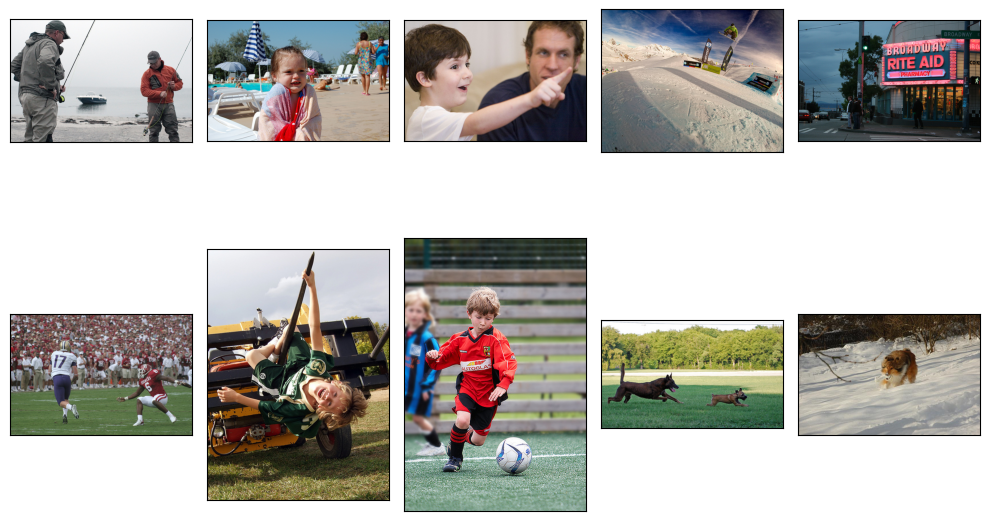

In [22]:
# Выведем картинки, который предлагаются нам для изучения:
data_train_image = list(df['image'].sample(10))

fig = plt.figure(figsize=(10,10))
for i in range(10):
    fig.add_subplot(2, 5, i+1)
    image = Image.open(Path(PATH, 'train_images', data_train_image[i]))
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()

Описание содержится только в одной таблице - df   

##### Вывод

Изучив предоставленные данные, можно сказать следующее:

1. тренировочный датасет содержит 5822 записи, всего - 1000 уникальных изображений, 977 - уникальных описаний изображений, на одно изображение может приходиться несколько разных описаний, явных дубликатов нет;
2. таблица с краудсорс-оценками имеет 47830 записей, в большинстве случаев идентификатор описания не соответствует изображению, поэтому оценка в большинстве случаев в столбце, в котором пользователи несогласны с описанием;  
3. таблица с оценками экспертов содержит 5822 записи, столько же сколько в тренировочном датасете, однако и здесь зачастую индентификатор описания не соответствует изображению, поэтому в большинстве случаев эксперты ставят заниженную оценку;  
4. в тестовом датасете иеется 500 записей, 100 уникальных изображений, на которые приходится по пять записей. Все записи уникальны.

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
ОК, данные загружены, есть знакомство, выводы </div>

Создадим столбец с количеством краудсортированных оценок для кажой позиции.     
Создадим столбец с вероятностью отрицательной оценки в тесте

df_crown['people']=df_crown['positive']+df_crown['negative']   
df_crown['probability_negative']=df_crown['negative']/df_crown['people']

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Зачем? Все лишние "эксперименты" лучше удалить из финальной версии преоекта

</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Комментарий студента</b></font>
   
удалила лишнее

</div>

За каждую пару изображение+описание проголосовали от 3 до 6 человек

Проверим данные на количество противоречивых оценок экспертов

In [23]:
df_exp.query('score_1 != score_2  != score_3').count()

image       126
query_id    126
score_1     126
score_2     126
score_3     126
dtype: int64

In [24]:
index_names=df_exp[(df_exp['score_1']!=df_exp['score_2']) & (df_exp['score_2']!=df_exp['score_3'])& (df_exp['score_1']!=df_exp['score_3'])].index

In [25]:
print('Процент разнородных отзывов экспертов {:.2%}'.format(len(index_names)/len(df_exp)))

Процент разнородных отзывов экспертов 2.16%


126 строчек содержит противоречивые отзывы экспертов,ни одна оценка экспертов не равна друг другу, от неуверенности  в том, что изображение соответствует описанию, до полного согласия, что объект соответствует описанию.   
Удалим эти срочки из датафрейма, ввиду того, что это могут быть стохастические ошибки. И их количество невелико, менее 3%

In [26]:
df_exp.drop(index_names,inplace=True)

In [27]:
#Создадим столбец с агрегированной оценкой экспертов, применим метод - медианы
def agr_data(row):

    row['agr_expert'] = int(np.median(row['score_1':'score_3']))

    return row

df_exp = df_exp.apply(agr_data, axis=1)
df_exp

,image,query_id,score_1,score_2,score_3,agr_expert
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,1,1,1,1
1,1056338697_4f7d7ce270.jpg,2718495608_d8533e3ac5.jpg#2,1,1,2,1
2,1056338697_4f7d7ce270.jpg,3181701312_70a379ab6e.jpg#2,1,1,2,1
3,1056338697_4f7d7ce270.jpg,3207358897_bfa61fa3c6.jpg#2,1,2,2,2
4,1056338697_4f7d7ce270.jpg,3286822339_5535af6b93.jpg#2,1,1,2,1
...,...,...,...,...,...,...
5817,997722733_0cb5439472.jpg,2981702521_2459f2c1c4.jpg#2,1,1,1,1
5818,997722733_0cb5439472.jpg,2985679744_75a7102aab.jpg#2,1,1,1,1
5819,997722733_0cb5439472.jpg,3150742439_b8a352e1e0.jpg#2,1,1,2,1
5820,997722733_0cb5439472.jpg,3375070563_3c290a7991.jpg#2,1,1,1,1


<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
ОК, но нужно обязательно проверить, как твоя функция отработала по тройкам, где все оценки разные.</div>

Создадим столбец с перекодированными оценками экспертов:  
1 - 0 соотвествия пары изображение+описание   
2 -0,35 соотвествие пары изображение+описание   
3 -0,7 соотвествие пары изображение+описание  
4 -1 полное соотвествие пары изображение+описание   

In [28]:
# Напишем "бейслайн", который разделяет данные относительно значения agr_expert, с учётом вышеперечисленной вероятности соответствия

def fraction(row):

    if row['agr_expert'] ==1:
        return 0
    elif row['agr_expert'] ==2:
        return 0.35
    elif row['agr_expert'] ==3:
        return 0.7
    return 1.0

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Чтобы привести к шкале 0-1 я бы посоветовал использовать линейное преобразование "минус 1 разделить на 3". Это гораздо проще, чем использовать if-else.
    
-------
    
Также вместо apply лучше использовать векторные операции (т.е. оперировать столбцом как вектором)
    
        df_exp['positive_exp'] = (df_exp['agr_expert'] - 1) / 3
    
</div>

In [29]:
df_exp['positive_exp']=df_exp[['agr_expert']].apply(fraction, axis=1)

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Пожалуйста не забывай, что по PEP8 вокруг операторов добавляются пробелы
</div>

In [30]:
df_exp.head(5)

,image,query_id,score_1,score_2,score_3,agr_expert,positive_exp
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,1,1,1,1,0.00
1,1056338697_4f7d7ce270.jpg,2718495608_d8533e3ac5.jpg#2,1,1,2,1,0.00
2,1056338697_4f7d7ce270.jpg,3181701312_70a379ab6e.jpg#2,1,1,2,1,0.00
3,1056338697_4f7d7ce270.jpg,3207358897_bfa61fa3c6.jpg#2,1,2,2,2,0.35
4,1056338697_4f7d7ce270.jpg,3286822339_5535af6b93.jpg#2,1,1,2,1,0.00


In [31]:
df_exp['query_id'].value_counts()

2600867924_cd502fc911.jpg#2    33
1554713437_61b64527dd.jpg#2    27
2522297487_57edf117f7.jpg#2    24
3254817653_632e840423.jpg#2    22
1536774449_e16b1b6382.jpg#2    21
                               ..
308487515_7852928f90.jpg#2      1
476759700_8911f087f8.jpg#2      1
424779662_568f9606d0.jpg#2      1
3138399980_d6ab8b2272.jpg#2     1
2292406847_f366350600.jpg#2     1
Name: query_id, Length: 977, dtype: int64

In [32]:
fig = px.histogram(
    df_exp, x='positive_exp',
    barmode='group',
    title='Доля экспертов, подтвердивших, что описание соответствует изображению',
    histfunc='count',
    category_orders={
        'collision_damage': ['0', '0.35', '0.7', '1']
    }
)
fig.show()

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Проект очень сложный. И чтобы работать со сложными проектами мы делим их на простые и понятные части и делаем проект по частям. Это помогает и в разработке (все по полочкам) и читателю все гораздо понятнее.
    
Так вот, важно разделить два важных шага - знакомство с данными и предобработка.  Вначале мы знакомися с данными, делаем выводы (и стараемся больше не отвлекаться). Во втором разделе мы готовим данные для обучения - объединяем, трансформируем таблицы, главный результат этапа - это датафрейм с признаками и таргетом, на котором мы сможем учить модели.
    
А сейчас получается "всего понемногу". Только настроились объединять таблички, как начинается изучение распрделения признаков. Лучше эти исследование перенести в исследовательский анализ.    
    
    
</div>

In [33]:
fig = px.histogram(
    df_crowd, x='probability_crowd',
    barmode='group',
    title='Доля людей на краудсортинге, подтвердивших, что описание соответствует изображению',
    histfunc='count'
)
fig.show()

На обоих диаграммах  видно, что качество соответствия описания картинок и самого изображения низкое, больше половины экспертов оценили, что картинка  и описание полностью не соответствуют друг другу

Создадим сводную таблицу, содержащую данные для обучения

In [34]:
data=df.merge(df_crowd[['image','query_id','probability_crowd']],
                         on=['image','query_id'], how='outer')

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
    
Молодец, что используешь соединение через outer
    
-------    
    
В этом проекте есть несколько возможных стратегий работы с обучающими и краудсорс оценками,  вот эти стратегии с плюсами и минусами:
   
    
 - использовать соединение через outer, в этом случае, при корректной обработке пропусков мы можем получить более 50К размеченых пар. К плюсам данного подхода можно отнести большое количество данных. Минус - в основном это будут данные, размеченные краудсорсерами, а там качество раметки ниже.
 - использовать только экспертные оценки. плюс - высокое качество данных (разметка имеет шкалу). Минус - данных меньше.  Поясню по поводу качества разметки на примере: если на изображении одна собака, а в описании "две собаки бегут по берегу", то эксперты поставять соответствие 0,6-0,7 (переводя в шкалу 0-1), а краудсорсеры поставят 0.  Но на экспертных оценках модель хотя-бы научится находить собак, а на краудсор оценках ничему не начится.
    
 - использование соединения через left.  Данный подход очевидно проигрывает второму варианту: данных столько же, нужно дополнительно возиться с объединением, но качество разметки снижается.. Но это соответсвует предложениям авторов проекта, поэтому такой подход имеет право на жизнь
    
 - объединение через inner. Тут все плохо - и данных ОЧЕНЬ мало (в два раза меньше, чем использовать только экспертные оценки) и качество у них "подпорчено". И навыков по обработке пропусков не получаем.....
    


</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
После использования merge очень важно посмотреть на полученный датафрейм. И самое важное здесь на мой взгляд - это количество записей в полученом датафрейме. Пожалуйста покажи info()
</div>

In [35]:
data.head(4)

,image,query_id,query_text,probability_crowd
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitting in a float in a pool .,0.0
1,1262583859_653f1469a9.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitting in a float in a pool .,NaN
2,2447284966_d6bbdb4b6e.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitting in a float in a pool .,0.0
3,2549968784_39bfbe44f9.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitting in a float in a pool .,1.0


In [36]:
df_train=data.merge(df_exp[['image','query_id','positive_exp']],
                         on=['image','query_id'], how='outer')

In [37]:
df_train.head()

,image,query_id,query_text,probability_crowd,positive_exp
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitting in a float in a pool .,0.0,0.00
1,1262583859_653f1469a9.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitting in a float in a pool .,NaN,0.00
2,2447284966_d6bbdb4b6e.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitting in a float in a pool .,0.0,0.35
3,2549968784_39bfbe44f9.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitting in a float in a pool .,1.0,1.00
4,2621415349_ef1a7e73be.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitting in a float in a pool .,NaN,0.00


Описание текста приводится в небольшой части ячеек

In [38]:
print('Уникальных изображений в трейне:', len(set(df_train['image'])))
print('Уникальных текстовых описаний в трейне:', len(set(df_train['query_text'])))

Уникальных изображений в трейне: 1000
Уникальных текстовых описаний в трейне: 978


In [39]:
df_train.isna().sum()

image                    0
query_id                 0
query_text           45501
probability_crowd     3493
positive_exp         45627
dtype: int64

Заполним пропуски в описании после объединения таблиц.

In [40]:
to_fill = df_train[df_train['query_text'].notna()]
def fill_text(row) -> object:

    '''заполняем пропуски текстов в тренировочном наборе данных'''

    if pd.isnull(row['query_text']):
        texts = to_fill[to_fill['query_id'] == row['query_id']]['query_text']
        if len(texts) > 0:
            row['query_text'] = texts.iloc[0]

    return row

df_train = df_train.apply(fill_text, axis=1)

In [41]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51323 entries, 0 to 51322
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   image              51323 non-null  object 
 1   query_id           51323 non-null  object 
 2   query_text         50214 non-null  object 
 3   probability_crowd  47830 non-null  float64
 4   positive_exp       5696 non-null   float64
dtypes: float64(2), object(3)
memory usage: 2.3+ MB


Удалим строки, которые не удалось заполнить текстовыми данными

In [42]:
# Удалим NaN значения для описания столбцов
df_train=df_train.query('query_text.notna()', engine="python")
display(df_train.head(10))
df_train.info()

,image,query_id,query_text,probability_crowd,positive_exp
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitting in a float in a pool .,0.0,0.00
1,1262583859_653f1469a9.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitting in a float in a pool .,NaN,0.00
2,2447284966_d6bbdb4b6e.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitting in a float in a pool .,0.0,0.35
3,2549968784_39bfbe44f9.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitting in a float in a pool .,1.0,1.00
4,2621415349_ef1a7e73be.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitting in a float in a pool .,NaN,0.00
5,3030566410_393c36a6c5.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitting in a float in a pool .,0.0,0.35
6,3155451946_c0862c70cb.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitting in a float in a pool .,NaN,0.00
7,3222041930_f642f49d28.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitting in a float in a pool .,NaN,0.00
8,343218198_1ca90e0734.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitting in a float in a pool .,NaN,0.00
9,3718964174_cb2dc1615e.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitting in a float in a pool .,0.0,0.00


<class 'pandas.core.frame.DataFrame'>
Int64Index: 50214 entries, 0 to 51322
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   image              50214 non-null  object 
 1   query_id           50214 non-null  object 
 2   query_text         50214 non-null  object 
 3   probability_crowd  46721 non-null  float64
 4   positive_exp       5696 non-null   float64
dtypes: float64(2), object(3)
memory usage: 2.3+ MB


Для обучения модели осталась выборка из 50 214 строк.   
Выведем на экран пример изображений людей

Создадим агрегированную оценку экспертов и краудсортиргонвой платформы

In [43]:
def calc_res(row):
    if pd.isna(row['positive_exp']) and pd.isna(row['probability_crowd']):
        return np.nan
    elif pd.isna(row['positive_exp']):
        return row['probability_crowd']
    elif pd.isna(row['probability_crowd']):
        return row['positive_exp']
    else:
        return row['positive_exp']*0.6 + row['probability_crowd']*0.4

df_train['res_score'] = df_train.apply(calc_res, axis=1)
df_train.head()

,image,query_id,query_text,probability_crowd,positive_exp,res_score
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitting in a float in a pool .,0.0,0.00,0.00
1,1262583859_653f1469a9.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitting in a float in a pool .,NaN,0.00,0.00
2,2447284966_d6bbdb4b6e.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitting in a float in a pool .,0.0,0.35,0.21
3,2549968784_39bfbe44f9.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitting in a float in a pool .,1.0,1.00,1.00
4,2621415349_ef1a7e73be.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitting in a float in a pool .,NaN,0.00,0.00


Удалим лишние столбцы из датафрейма

In [44]:
df_train = df_train.drop(['positive_exp'], axis=1)

In [45]:
df_train.head(5)

,image,query_id,query_text,probability_crowd,res_score
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitting in a float in a pool .,0.0,0.00
1,1262583859_653f1469a9.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitting in a float in a pool .,NaN,0.00
2,2447284966_d6bbdb4b6e.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitting in a float in a pool .,0.0,0.21
3,2549968784_39bfbe44f9.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitting in a float in a pool .,1.0,1.00
4,2621415349_ef1a7e73be.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitting in a float in a pool .,NaN,0.00


In [46]:
df_train['res_score'].unique()

array([0.        , 0.21      , 1.        ,        nan, 0.55333333,
       0.35      , 0.34333333, 0.42      , 0.7       , 0.82      ,
       0.73333333, 0.68666667, 0.47666667, 0.61      , 0.86666667,
       0.66666667, 0.52      , 0.29      , 0.31      , 0.33333333,
       0.1       , 0.72      , 0.58      , 0.74      , 0.13333333,
       0.25      , 0.41      , 0.62      , 0.6       , 0.2       ,
       0.5       , 0.4       , 0.75      , 0.16666667, 0.8       ])

удалим из дата фрейма строки с Nan

In [47]:
df_train.dropna(inplace=True) #удалим Nan

In [48]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46721 entries, 0 to 51322
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   image              46721 non-null  object 
 1   query_id           46721 non-null  object 
 2   query_text         46721 non-null  object 
 3   probability_crowd  46721 non-null  float64
 4   res_score          46721 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.1+ MB


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Отлично, вижу что ты справилась со сборкой итогового датафрейма</div>

Переведем текст в формат

In [155]:
#создадим функцию для обработки текстового столбца
def clear_text(text):
    text = text.lower()
    text=re.sub(r'[^a-zA-Z]', ' ', text) # оставляем только буквенные символы
    text=" ".join(text.split())
    return text

In [50]:
#очистим столбец текстовый:
df['query_text'] = df['query_text'].apply(clear_text)

Проведем лематизацию

In [51]:
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])

In [158]:
def spacy(sentence):
    doc = nlp(sentence)
    return " ".join([token.lemma_ for token in doc])

df['query_text'] = df['query_text'].apply(spacy)

In [157]:
test_queries['query_text'] = test_queries['query_text'].apply(clear_text)

In [159]:
test_queries['query_text'] = test_queries['query_text'].apply(spacy)

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Ок, есть чистка и лемматизация. Пригодится )) </div>

## 2. Проверка данных

В некоторых странах, где работает ваша компания, действуют ограничения по обработке изображений: поисковым сервисам и сервисам, предоставляющим возможность поиска, запрещено без разрешения родителей или законных представителей предоставлять любую информацию, в том числе, но не исключительно тексты, изображения, видео и аудио, содержащие описание, изображение или запись голоса детей. Ребёнком считается любой человек, не достигший 16 лет.

В вашем сервисе строго следуют законам стран, в которых работают. Поэтому при попытке посмотреть изображения, запрещённые законодательством, вместо картинок показывается дисклеймер:

> This image is unavailable in your country in compliance with local laws
>

Однако у вас в PoC нет возможности воспользоваться данным функционалом. Поэтому все изображения, которые нарушают данный закон, нужно удалить из обучающей выборки.

Создадим список слов, которые  могут в описании указывать на изображение ребенка.

In [53]:
stop_words = ['child', 'children', 'baby', 'babies', 'girl', 'boy', 'girls', 'boys', 'kid', 'kids', 'juvenile', 'youngster',
              'minor', 'minors', 'teen', 'teens', 'teenager', 'teenagers', 'underage', 'infant', 'infants', 'toddler', 'toddlers']

In [54]:
def check_kids(row):
    text = row.loc['query_text']
    for word in text.split():
        if word in stop_words:
            return True
    return False

In [55]:
# (добавляем столбец) создаем список/таблицу с признаком наличия "запрещенных" слов в тексте
df_train['kids_list'] = df_train.apply(check_kids, axis=1)

In [56]:
display(df_train.head(5))

,image,query_id,query_text,probability_crowd,res_score,kids_list
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitting in a float in a pool .,0.0,0.00,True
2,2447284966_d6bbdb4b6e.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitting in a float in a pool .,0.0,0.21,True
3,2549968784_39bfbe44f9.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitting in a float in a pool .,1.0,1.00,True
5,3030566410_393c36a6c5.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitting in a float in a pool .,0.0,0.21,True
9,3718964174_cb2dc1615e.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitting in a float in a pool .,0.0,0.00,True


Видим, что в тексте присутсвует описание детей, очистим тренировочную базу данных

In [57]:
def spl(text):
    return text[:text.find('#')]

In [58]:
num_forb_images = len(df_train[df_train['kids_list']==True]['query_id'].apply(spl).unique())

In [59]:
num_forb_images

277

В тренировочных данных мы нашли 277 изображений с детьми. Создадим новую таблицу, в которую войдут только те строки, которые не содержат детские изображения.

In [60]:
# Фильтрация строк, где kids_list = True
df_train = df_train[df_train['kids_list'] != True].reset_index(drop=True)

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Смотри, условие,  что в колонке kids_list содержится True означает что в <b>описании</b> есть упоминание детей. Но ты же сама пишешь, что описание не всегда совпадают с изображениями.
    
И ты совершенно коррекно находишь все нежелательные изображения, используя то, что  query_id содержит в себе название изображения, для которого писался. И у тебя есть список из 277 нежелательных изображений.
    
Остался последний шаг - просто удали все строки, где изображение входит в  список
    
    df_train[df_train['kids_list']==True]['query_id'].apply(spl).unique()

</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Комментарий студента</b></font>
   
Удалила изображения из списка

</div>

In [61]:
kids_photo=df_train[df_train['kids_list']==True]['query_id'].apply(spl).unique()

In [62]:
df_train = df_train[~df_train['image'].isin(kids_photo)]

In [63]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33907 entries, 0 to 33906
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   image              33907 non-null  object 
 1   query_id           33907 non-null  object 
 2   query_text         33907 non-null  object 
 3   probability_crowd  33907 non-null  float64
 4   res_score          33907 non-null  float64
 5   kids_list          33907 non-null  bool   
dtypes: bool(1), float64(2), object(3)
memory usage: 1.6+ MB


In [64]:
df_train.head(5)

,image,query_id,query_text,probability_crowd,res_score,kids_list
0,463978865_c87c6ca84c.jpg,3181701312_70a379ab6e.jpg#2,A man sleeps under a blanket on a city street .,0.0,0.21,False
1,370713359_7560808550.jpg,3207358897_bfa61fa3c6.jpg#2,A woman plays with long red ribbons in an empty square .,0.0,0.00,False
2,1962729184_6996e128e7.jpg,3286822339_5535af6b93.jpg#2,Chinese market street in the winter time .,0.0,0.00,False
3,2101457132_69c950bc45.jpg,3286822339_5535af6b93.jpg#2,Chinese market street in the winter time .,0.0,0.00,False
4,2351479551_e8820a1ff3.jpg,3360930596_1e75164ce6.jpg#2,A soccer ball is above the head of a man wearing black shorts and red and black striped shirt .,0.0,0.00,False


In [65]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33907 entries, 0 to 33906
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   image              33907 non-null  object 
 1   query_id           33907 non-null  object 
 2   query_text         33907 non-null  object 
 3   probability_crowd  33907 non-null  float64
 4   res_score          33907 non-null  float64
 5   kids_list          33907 non-null  bool   
dtypes: bool(1), float64(2), object(3)
memory usage: 1.6+ MB


In [66]:
#удалили вспомогательный столбец kids_list
df_train.drop(columns=['kids_list'], inplace=True)
df_train.reset_index(inplace=True, drop=True)

In [67]:
print('Количество явных дубликатов -', df_train.duplicated().sum())

Количество явных дубликатов - 0


In [68]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33907 entries, 0 to 33906
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   image              33907 non-null  object 
 1   query_id           33907 non-null  object 
 2   query_text         33907 non-null  object 
 3   probability_crowd  33907 non-null  float64
 4   res_score          33907 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.3+ MB


После удаления из датасета строк с изображениями детей и соответствующим описанием получили таблицу в которой 35865 строк.

In [69]:
datagen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

train_gen_flow = datagen.flow_from_dataframe(
        dataframe=df_train,
        directory=Path(PATH + '/train_images/'),
        x_col='image',
        y_col='res_score',
        target_size=(224, 224),
        batch_size=16,
        class_mode='input',
        seed=12345)

# Генерируем и отображаем изображения и их оценки
features, target = train_gen_flow.next()

Found 33907 validated image filenames.


In [70]:
len(train_gen_flow)

2120

In [71]:
train_gen_flow

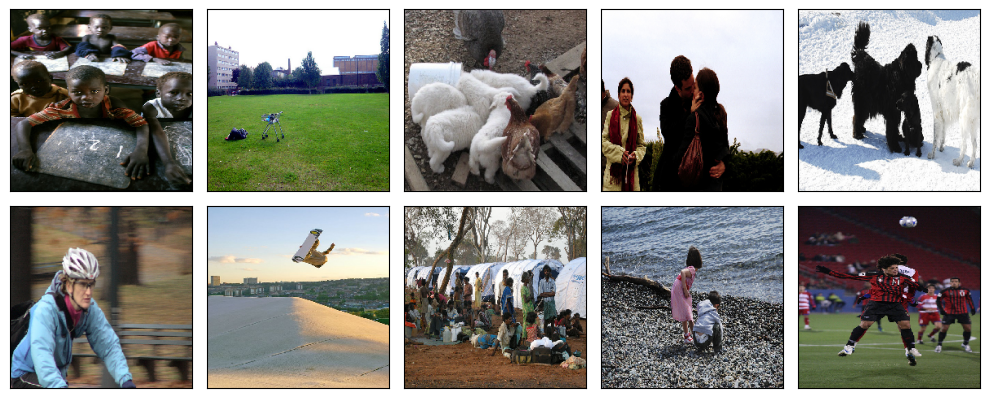

In [72]:
fig = plt.figure(figsize=(10,10))
for i in range(10):
    fig.add_subplot(5, 5, i+1)
    plt.imshow(features[i])
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
О, оказывается ты все-таки используешь keras.
    
Но тянуть в проект библиотеку, предназначенную для обучения нейронных сетей и применять её только для вывода изображений это "стрелять из пушки по воробьям".  К тому же использование в одном проекте двух DL фреймовков это очень сложно с точки зрения поддержки.
    
Для вывода изображений вполне достаточно стардартной библиотеки PIL, входящей в станадртную "поставку" python
    
https://habr.com/ru/articles/681248/
    
https://pillow.readthedocs.io/en/stable/index.html    
</div>

## 3. Векторизация изображений

Перейдём к векторизации изображений.

Самый примитивный способ — прочесть изображение и превратить полученную матрицу в вектор. Такой способ нам не подходит: длина векторов может быть сильно разной, так как размеры изображений разные. Поэтому стоит обратиться к свёрточным сетям: они позволяют "выделить" главные компоненты изображений. Как это сделать? Нужно выбрать какую-либо архитектуру, например ResNet-18, посмотреть на слои и исключить полносвязные слои, которые отвечают за конечное предсказание. При этом можно загрузить модель данной архитектуры, предварительно натренированную на датасете ImageNet.

In [77]:
resnet = models.resnet18(pretrained=True) #загружаем претренированную модель

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning:

The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning:

Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 104MB/s]


In [78]:
for param in resnet.parameters():
    param.requires_grad_(False)

In [79]:
print(list(resnet.children()))

[Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False), BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True), ReLU(inplace=True), MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False), Sequential(
  (0): BasicBlock(
    (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (1): BasicBlock(
    (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bia

In [80]:
modules = list(resnet.children())[:-1]
resnet = nn.Sequential(*modules)

In [81]:
resnet.eval();

Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (4): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Con

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
"Приглушить" нежелательный вывод объектов, возвращаемых в последней строке ячейки можно просто добавив точку с запятой в конце команды.

</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
<b>минутка теории</b>
 По умолчанию jupyter notebook выводит результат вычислений в последней строке ячейки, если этот результат не записан в переменную. Мы часто пользуемся этим, обратившись к какому-нибудь объекту в последней строке и видим результат без дополнительных print() или dispay()
    
    
  Ниже три ячейки с кодом. Обрати внимание, если просто сделать вычисление - то результат выводится, но если добавить точку с запятой или записать результат в переменную, то ничего не происходит. Обрати внимание, когда происходит вывод:
   - последня строка
   - нет точки с запятой в конце
    
   - результат не записан в переменную

И досточно убрать одно из этих условий, как вывода нет.

![image-4.png](attachment:image-4.png)    

 Функции matlitlib не только выводят графики, но и возвращают python объекты axis. Это внутренняя кухня, чтобы можно было строить сложные графики. Но для нас побочным эффектом является то, что в ноутбуке мы видим текстовое предоставление объекта, которое выводит ноутбук. И для красоты такое поведение стоит заблокировать.



</div>

In [85]:
norm = transforms.Normalize(
    mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    norm,
])

In [86]:
img = Image.open(PATH + '/train_images/2549968784_39bfbe44f9.jpg').convert('RGB')

In [87]:
image_tensor = preprocess(img)
output_tensor = resnet(image_tensor.unsqueeze(0)).flatten() # перевод тензор в вектор

In [88]:
output_tensor.size()

torch.Size([512])

In [89]:
def vect_train(string):
    img = Image.open(path+string['image']).convert('RGB')
    image_tensor = preprocess(img)
    output_tensor = resnet(image_tensor.unsqueeze(0)).flatten()
    output_tensor.size()
    return output_tensor.numpy()

In [92]:
path = PATH + '/train_images/'
vector_image_df = np.array(df_train.apply(vect_train, axis=1))

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">

    
У тебя 1000 уникальных изображений (изначально было 1000, но 277 может уйти при чистке). При этом ты векторизуешь больше 36 тысяч изображений. Значит некоторые изображения векторизуются по нескольку раз. Учитыая что ты написала отдельную функцию для векторизации изображения можно ускорить её работу используя кэширование. Попробуй загуглить @lru_cache, это декоратор для кэширования, входящий в стадартную библиотеку python
    
Правда чтобы декоратор заработал, тип, которы ты передаешь в функцию нужно сменить на String (сейчас у тебя там ряд датафрейма). И применять к колонке с названиями изображений.    
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Комментарий студента</b></font>
   
Согласна с замечанием, не смогла как-то разобраться с кэшированием, пока оставила, как есть

</div>

In [93]:
vector_image_df.shape

(33907,)

In [94]:
type(vector_image_df)

numpy.ndarray

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Здесь все ОК, векторизация изображений произведена верно </div>

## 4. Векторизация текстов

Следующий этап — векторизация текстов. Вы можете поэкспериментировать с несколькими способами векторизации текстов:

- tf-idf
- word2vec
- \*трансформеры (например Bert)

\* — если вы изучали трансформеры в спринте Машинное обучение для текстов.


In [95]:
train_corpus = df_train['query_text'].values
nltk.download('stopwords')
#stop_words = set(stopwords.words('english'))

count_tf_idf = TfidfVectorizer(stop_words=stopwords.words('english'))
#(stop_words=set(stopwords.words('english')))
#s(stop_words=stopwords.words('english'))

text_vect = count_tf_idf.fit_transform(train_corpus)
text_vect.shape

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


(33907, 1161)

In [96]:
vector_text_df = text_vect.toarray()
type(vector_text_df)

numpy.ndarray

In [97]:
vector_text_df.shape

(33907, 1161)

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 Вектора для текста получены с помощью TF-IDF. Здесь конечно есть очень тонкий момент, и в другом проекте это мог бы быть красный комментарий. Ты же помнишь, что векторайзеры мы обучаем на обучающем датасете и применяем к валидационому и тестовому. А сейчас ты сделал вектора с использованием всех частей датасета.  Но для этого проекта это должно быть допустимо, т.к. .утечка,повышающая оценку на валидации врядли что-то сильно  испортит.</div>

## 5. Объединение векторов

Подготовьте данные для обучения: объедините векторы изображений и векторы текстов с целевой переменной.

In [98]:
X_train = np.hstack([np.vstack(vector_image_df), vector_text_df])

In [99]:
y=df_train['res_score']

In [100]:
# Выведем размерности полученных массивов
print("Размерность массива признаков:", X_train.shape)
print("Размерность целевой переменной:", y.shape)

Размерность массива признаков: (33907, 1673)
Размерность целевой переменной: (33907,)


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 Вектора, полученные из текста и изображения объеденены👍 </div>

## 6. Обучение модели предсказания соответствия

Для обучения разделите датасет на тренировочную и тестовую выборки. Простое случайное разбиение не подходит: нужно исключить попадание изображения и в обучающую, и в тестовую выборки.
Для того чтобы учесть изображения при разбиении, можно воспользоваться классом [GroupShuffleSplit](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GroupShuffleSplit.html) из библиотеки sklearn.model_selection.

Код ниже разбивает датасет на тренировочную и тестовую выборки в пропорции 7:3 так, что строки с одинаковым значением 'group_column' будут содержаться либо в тестовом, либо в тренировочном датасете.

Какую модель использовать — выберите самостоятельно. Также вам предстоит выбрать метрику качества либо реализовать свою.

In [101]:
gss = GroupShuffleSplit(n_splits=1, train_size=.7, random_state=12345)

In [102]:
train_indices, valid_indices = next(gss.split(X=X_train, y=y, groups=df_train['image']))

In [103]:
X_train, X_valid = X_train[train_indices], X_train[valid_indices]

In [104]:
y_train, y_valid = y[train_indices], y[valid_indices]

In [105]:
# Выведем размерности полученных массивов
print("Размерность массива признаков:", X_train.shape)
print("Размерность целевой переменной:", y_train.shape)

Размерность массива признаков: (23786, 1673)
Размерность целевой переменной: (23786,)


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Отлично, благодаря использованию GroupShuffleSplit ты исключаешь попадание одного изображения в обучающий и валидационный наборы.</div>

Сначала построим константную модель Dummy Regressor, чтоб затем проверить результат работы наших моделей.  

Метрикой выберем RMSE, так как  у нас задача регрессии, чем ближе значение к нулю, тем лучше качество. Преимущество выбора данной метрики в том, что она измеряется в той же единице, что и целевая переменная.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
В этом задании требуется выбрать основную метрику, которую ты будешь оптимизировать. Пожаулуйста обоснуй свой выбор.  </div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Мы решаем новую задачу и не знаем, наксколько хороши наши метрики и наши модели. Поэтому советую начать с бейзлайна - константной модели (можешь взять простой DummyRegressor).</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>Комментарий студента</b></font>
   
Добавила описание метрики и модель Dummy regressor

</div>

### *Dummy Regressor*

In [106]:
# Инициализируем и обучаем StandardScaler на обучающих данных
scaler = StandardScaler()
scaler.fit(X_train)

# Преобразуем обучающие и тестовые данные с помощью StandardScaler
X_train = scaler.transform(X_train)
X_valid = scaler.transform(X_valid)

In [109]:
dummy_model = DummyRegressor(strategy='median')
model_dm=dummy_model.fit(X_train, y_train)

In [110]:
# Получим прогнозы
predictions_dm = model_dm.predict(X_valid)

In [112]:
# Вычислим и выведем RMSE (Корень из среднеквадратичной ошибки)
rmse_dm = np.sqrt(mean_squared_error(y_valid, predictions_dm))
print(f'RMSE для модели линейной регрессии: {rmse_dm:.4f}')

RMSE для модели линейной регрессии: 0.2349


### *Linear Regression*

Обучим модель LinearRegression на созданных данных. Для проверки качества модели, здесь и ниже, буду использовать метрику RMSE.

In [113]:
model_lr = LinearRegression()

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 </div>

In [114]:
# Обучим модель линейной регрессии
model_lr = model_lr.fit(X_train, y_train)

# Получим прогнозы
predictions = model_lr.predict(X_valid)

In [115]:
# Вычислим и выведем RMSE (Корень из среднеквадратичной ошибки)
rmse_lr = np.sqrt(mean_squared_error(y_valid, predictions))
print(f'RMSE для модели линейной регрессии: {rmse_lr:.4f}')

RMSE для модели линейной регрессии: 0.2303


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 </div>

### *Построение нейронной сети*

In [116]:
# Переведём выборки в тензоры
X_train = torch.FloatTensor(np.array(X_train))
X_valid = torch.FloatTensor(np.array(X_valid))
y_train = torch.FloatTensor(np.array(y_train))
y_valid = torch.FloatTensor(np.array(y_valid))

In [123]:
# исходные данныедля обучения модели
num_epochs = 5000
batch_size = 16
num_batches = ceil(len(X_train)/batch_size)

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 Старайся количество нейронов в слое и размер батча привязывать к степени 2. Так оптимальнее с точки зрения испльзования ресурсов видеокарты. 512...64...64... 16....8

Есть еще одно эмпирическое правило - размер батча стоит сделать максимальным, входящим в оперативную память (или память GPU). Просто так обучение происходит стабильнее, а батчи придумали из за ограничений (слишком много памяти занимают состояния модели, включая все градиенты).

</div>

In [192]:
class Net(nn.Module):
    def __init__(self,
                 n_in_neurons, n_hidden_neurons_1, n_hidden_neurons_2,n_hidden_neurons_3, n_hidden_neurons_4, n_hidden_neurons_5, n_out_neurons,
                  act1, act2,act3,act4,act5,act6):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(n_in_neurons, n_hidden_neurons_1)
        self.act1 = act1


        self.fc2 = nn.Linear(n_hidden_neurons_1, n_hidden_neurons_2)
        self.act2 = act2

        self.fc3 = nn.Linear(n_hidden_neurons_2, n_hidden_neurons_3)
        self.act3 = act3

        self.fc4 = nn.Linear(n_hidden_neurons_3, n_hidden_neurons_4)
        self.act4 = act4

        self.fc5 = nn.Linear(n_hidden_neurons_4, n_hidden_neurons_5)
        self.act5 = act5

        self.fc6 = nn.Linear(n_hidden_neurons_5, n_out_neurons)
        self.act6 = act6


    def forward(self, x):
        x = self.act1(self.fc1(x))
        x = self.act2(self.fc2(x))
        x = self.act3(self.fc3(x))
        x = self.act4(self.fc4(x))
        x = self.act5(self.fc5(x))
        x = self.act6(self.fc6(x))


        return x

In [194]:
#Параметры для обучения модели

n_in_neurons = X_train.shape[1]
n_hidden_neurons_1 = 512
n_hidden_neurons_2 = 256
n_hidden_neurons_3 = 128
n_hidden_neurons_4 = 32
n_hidden_neurons_5 = 16
n_out_neurons = 1

act1, act2, act3, act4, act5, act6=nn.ReLU(), nn.LeakyReLU(), nn.ReLU(), nn.LeakyReLU(), nn.ReLU(), nn.ReLU()

In [195]:
# обучаем модель с заданными параметрами
net = Net(n_in_neurons, n_hidden_neurons_1, n_hidden_neurons_2,n_hidden_neurons_3,n_hidden_neurons_4, n_hidden_neurons_5, n_out_neurons,
                  act1, act2,act3,act4,act5,act6)
optimizer = torch.optim.Adam(net.parameters(), lr=1e-3)
loss = nn.MSELoss()


In [196]:
def training (net,  name,
            X_train,
              y_train,
              X_valid, y_valid,
            num_epochs,
            batch_size,
              num_batches,
              optimizer, loss,
              log_it=True,
            verbose=True,
             #list_res = results) -> None
             ):

    counter = 0 # счётчик эпох для ранней остановки
    loss_prev = 100000 # исходное значение функции потерь для ранней остановки
    min_loss = 100000 # исходное значение функции потерь для лучшей модели
    tol=100

    for epoch in range(num_epochs):
        order = np.random.permutation(len(X_train))# создайте случайную перестановку индексов объектов
        for batch_idx in range(num_batches):
            start_index = batch_idx * batch_size   # посчитайте номер стартового объекта батча
            optimizer.zero_grad()
            batch_indexes =order[start_index:start_index+batch_size]  # извлеките индексы объектов текущего обатча
            X_batch = X_train[batch_indexes]
            y_batch = y_train[batch_indexes]

            preds = net.forward(X_batch)

            loss_value = loss(preds, y_batch)

            loss_value = torch.sqrt(loss(preds, y_batch))
            loss_value.backward()
            optimizer.step()

            if epoch % 20 == 0 or epoch == max(range(num_epochs)):
                with torch.no_grad():
                    net.eval()
                    test_preds = net(X_valid).flatten()
                    loss_rmse = torch.sqrt(loss(test_preds, y_valid))
                    print(f'RMSE на {epoch} итерации =', loss_rmse)

        # ранняя остановка
        delta = int(loss_value) - int(loss_prev)
        if delta >= 0 and counter >= tol:
            break
        elif delta >= 0 and counter < tol:
            counter += 1
            loss_prev = loss_value
        else:
            counter = 0 # прерываем серию если функция потерь уменьшилась
            loss_prev = loss_value

        # фиксация лучшей версии сети
        if int(loss_value) < min_loss:
            best_net = copy.deepcopy(net)
            best_epoch = epoch + 1
            min_loss = int(loss_value)

    return (best_epoch,
            best_net,
            num_epochs,
            torch.sqrt(loss(best_net(X_train), y_train)),
            torch.sqrt(loss(best_net(X_valid), y_valid)))

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
На мой взгляд ты воспринимаешь "количество эпох" как гиперпараметр "спущеный с верху". Т.е. устанавливаем параметры сети, запускаем обучение и смотрим на результат.
    
Но в случае с нейронками логика ипользования немного отличается от того, к чему мы привыкли в классических моделях. Здесь лучше работать по другой логике:
    
 - оределилил архитектуру, создали модель
 - начинаем её учить. и учим пока метрика на валидационной выборке улучшается.  Наблюдая в динамике метрики на обучающей и валидационной выборках.
 - если вдруг метрика на обучающей выборке перестала снижаться, можно попробовать уменьшить шаг обучения (например в 10 раз) и продолжить обучение модели.
    
В любом случае полезно обучать модель пока метрика на валидации улучшается. Наша цель - оптимальное состояние модели, при котором модель хорошо находит законмоерности в данных, но еще не переобучилась.
        
После того, как закончили обучение смотрим на логи, анализируем, чего модели не хватило, меняем архитектуру и запускаем обучение по новой.    
    
-----
    
Ты учишь модель всего 100 эпох.. Это тем более странно, что в твоем коде я вижу использование механизма EarlyStopping, который настроен отключение если 100 эпох подряд метрика на валидации не улучшается.        
    

    

    
</div>

In [197]:
best_epoch,best_net,num_epochs,rmse_train,rmse_valid = training (net,'Нейронная сеть',
            X_train,
              y_train,
              X_valid, y_valid,
            num_epochs,
            batch_size,
              num_batches,
              optimizer, loss)

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning:

Using a target size (torch.Size([16])) that is different to the input size (torch.Size([16, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.



RMSE на 0 итерации = tensor(0.2223)
RMSE на 0 итерации = tensor(0.2204)
RMSE на 0 итерации = tensor(0.2288)
RMSE на 0 итерации = tensor(0.2557)
RMSE на 0 итерации = tensor(0.2455)
RMSE на 0 итерации = tensor(0.2327)
RMSE на 0 итерации = tensor(0.2231)
RMSE на 0 итерации = tensor(0.2202)
RMSE на 0 итерации = tensor(0.2200)
RMSE на 0 итерации = tensor(0.2203)
RMSE на 0 итерации = tensor(0.2214)
RMSE на 0 итерации = tensor(0.2227)
RMSE на 0 итерации = tensor(0.2235)
RMSE на 0 итерации = tensor(0.2251)
RMSE на 0 итерации = tensor(0.2262)
RMSE на 0 итерации = tensor(0.2272)
RMSE на 0 итерации = tensor(0.2280)
RMSE на 0 итерации = tensor(0.2279)
RMSE на 0 итерации = tensor(0.2290)
RMSE на 0 итерации = tensor(0.2296)
RMSE на 0 итерации = tensor(0.2295)
RMSE на 0 итерации = tensor(0.2310)
RMSE на 0 итерации = tensor(0.2334)
RMSE на 0 итерации = tensor(0.2343)
RMSE на 0 итерации = tensor(0.2346)
RMSE на 0 итерации = tensor(0.2347)
RMSE на 0 итерации = tensor(0.2348)
RMSE на 0 итерации = tensor(

KeyboardInterrupt: 

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Было бы неплохо показать как менялись метрики (на обучающей и валидационных выборках) на протяжении всего обучения. Опираясь на эту информацию мы можем принять решение: продолжить обучение этой модели или что-то изменить в гиперпараметрах.

</div>

In [130]:
best_net

Net(
  (fc1): Linear(in_features=1673, out_features=512, bias=True)
  (act1): ReLU()
  (reg1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (act2): LeakyReLU(negative_slope=0.01)
  (reg2): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=256, out_features=128, bias=True)
  (act3): ReLU()
  (fc4): Linear(in_features=128, out_features=64, bias=True)
  (act4): LeakyReLU(negative_slope=0.01)
  (fc5): Linear(in_features=64, out_features=32, bias=True)
  (act5): ReLU()
  (fc6): Linear(in_features=32, out_features=1, bias=True)
  (act6): ReLU()
)

In [131]:
df_results = pd.DataFrame({'Название':['Нейросеть'],
                          'Лучшая эпоха': [best_epoch],
                           'RMSE на обучении': rmse_train.detach().numpy(),
                          'RMSE на тесте': rmse_valid.detach().numpy()})

In [132]:
df_results

,Название,Лучшая эпоха,RMSE на обучении,RMSE на тесте
0,Нейросеть,1,0.241413,0.234881


## 7. Тестирование модели

Настало время протестировать модель. Для этого получите эмбеддинги для всех тестовых изображений из папки `test_images`, выберите случайные 10 запросов из файла `test_queries.csv` и для каждого запроса выведите наиболее релевантное изображение. Сравните визуально качество поиска.

In [160]:
path = os.path.join(PATH+ '/test_images/')

In [161]:
path

'/kaggle/input/to_upload//test_images/'

In [162]:
test_img_vec = np.array(test_images.apply(vect_train, axis=1))
test_img_vec.shape

(100,)

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Да, векторизацию тестовых изображений лучше сделать заранее </div>

In [163]:
test_queries

,query_id,query_text,image
0,1177994172_10d143cb8d.jpg#0,two blonde boy one in a camouflage shirt and the other in blue be have a water fight,1177994172_10d143cb8d.jpg
1,1177994172_10d143cb8d.jpg#1,two boy be squirt water gun at each other,1177994172_10d143cb8d.jpg
2,1177994172_10d143cb8d.jpg#2,two boy spray each other with water,1177994172_10d143cb8d.jpg
3,1177994172_10d143cb8d.jpg#3,two child wear jean squirt water at each other,1177994172_10d143cb8d.jpg
4,1177994172_10d143cb8d.jpg#4,two young boy be squirt water at each other,1177994172_10d143cb8d.jpg
...,...,...,...
495,989851184_9ef368e520.jpg#0,a black dog have a dumbbell in his mouth,989851184_9ef368e520.jpg
496,989851184_9ef368e520.jpg#1,a black dog have a dumbbell in his mouth look at the person wear blue,989851184_9ef368e520.jpg
497,989851184_9ef368e520.jpg#2,a black dog hold a weight in its mouth stand next to a person,989851184_9ef368e520.jpg
498,989851184_9ef368e520.jpg#3,a black dog hold a small white dumbbell in its mouth,989851184_9ef368e520.jpg


<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
А вот делать предобработку текстовых запросов заранее нет смысла. Эту логику (чистку, лемматизацию, векторизацию) лучше внести в тело функции для инференса.
</div>

In [164]:
def list_text(text):
    text = text.split()
    return text

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
ОК, но мне кажется это лишний наворот. Не стоит писать функцию, которая запускает стандартный метод .split()</div>

In [182]:
def show(img, title=None):
    plt.figure(figsize=(3,3))
    plt.imshow(img)

    if title is not None:
        plt.title(title)

    plt.axis('off')

In [198]:
def images_output(text):
    if [i for i in list_text(text) if i in stop_words]:
        print()
        print('This image is unavailable in your country in compliance with local laws')
    else:
        #получим вектор текста
        corpus = [text] * 100
        tf_idf = count_tf_idf.transform(corpus)
        vector_text_test = tf_idf.toarray()

        #соединим вектор текста с вектором изображения
        X_test = (np.hstack([np.vstack(test_img_vec), vector_text_test]))

        #получим предсказание вероятности
        best_net.eval()
        with torch.no_grad():
          X=torch.FloatTensor(np.array(X_test))
          predicted_test_final = best_net(X).flatten().detach().numpy()
          max_index = np.argmax(predicted_test_final)
          image_path = test_queries.iloc[max_index]['image']
          img = Image.open(os.path.join(PATH,'test_images', image_path))
          show(img, title=(text + ' ' + str(round(predicted_test_final[max_index],3))))

In [200]:
def ten_texts():
    texts = []
    for i in range(0,10):
        texts.append(test_queries.iloc[rd.randint(0, 499)]['query_text'])
    return texts


This image is unavailable in your country in compliance with local laws

This image is unavailable in your country in compliance with local laws

This image is unavailable in your country in compliance with local laws

This image is unavailable in your country in compliance with local laws


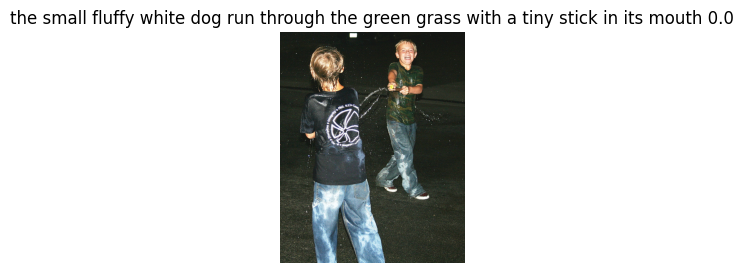

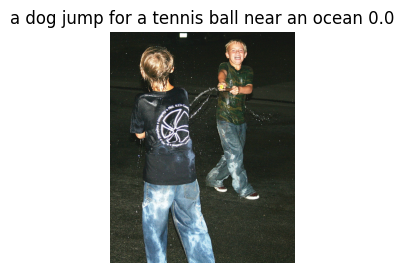

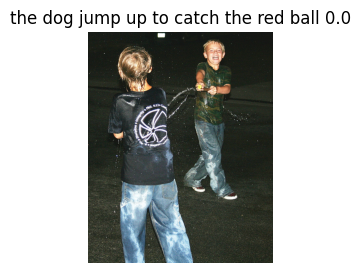

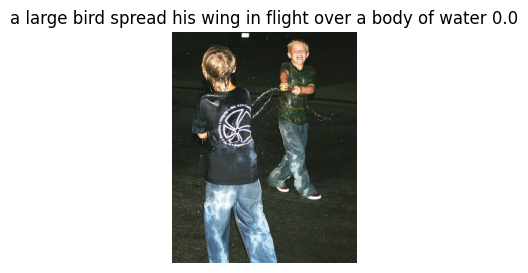

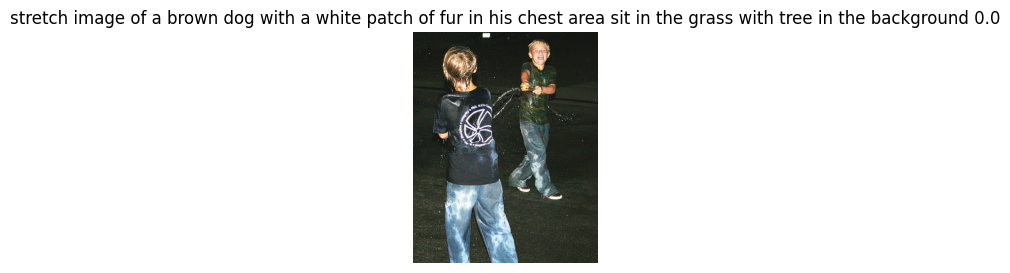

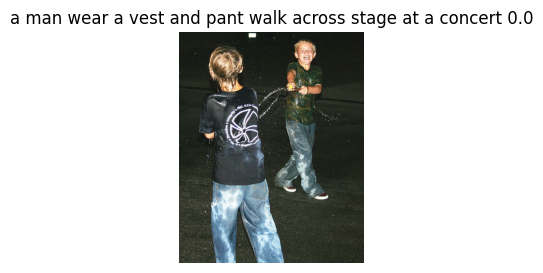

In [201]:
for item in ten_texts():
    images_output(item)

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Функции написаны и со своей задачей справляются. Принимают на вход текст и находят изображение. Отрабатывают контроль "запрещенного контента".

К сожалению работают они не очень. На мой взгляд базовых причины две: использование краудсорс оценок, имеющих достаточно низкое качество разметки и использование TF-IDF. По какой-то причине именно подход с TF-IDF дает наихудший результат.
    
Ну и возможно ты просто недоучила модель. По опыту скажу 100 эпох крайне мало. В некоторых проектах речь шла о тысячах (вплоть до десятков тысяч) эпох.    
</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
Пожалуйста доработай демонстрацию работы функции таким образом, чтобы подпись + оценка соответствия + изображение были рядом, а не раскидывались по всей ячейке.</div>

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Идеи и альтернативные подходы</b>
  Если хочешь получить хорошо работающее решение без обучения, то можешь провести эксперимент с нейронной сетью CLIP от OPEN AI (это не обязательно, только если хочешь добиться хороших результатов в этом проекте).

  Про эту нейронку много где написано, но можешь посмотреть например вот здесь  https://habr.com/ru/post/539312/.

  А для написания  реализации наиболее удобной лично для меня оказалась библиотека sbert. https://www.sbert.net/examples/applications/image-search/README.html  
    
    
<hr>    
    
Также неплохо работает следующий подход без предобученных моделей (к тому же легко реализуемый).
    
    
Вместо того, чтобы подавать на вход модели изображение + текст и получать меру соответствия, поступаем по другому.
    
На вход модели подаем вектор описания, а на выходе учимся предсказывать вектор изображения.
    
По поводу метрик тут ситуация следующая. Точно работает следующий подход
    
  - берем метрику mse, но тогда нужно чтобы модель её уменьшала. А значит в обучении используем только пары заведомо сответствующие друг другу

Можно попробовать использовать косинусное расстояние, она позволяет использовать все данные (если есть соответствие то выдает 1, если нет то 0).
    
Также можно попробовать усложнить модель, например и изображения и тексты отправлять в пространство размерностью 256 и уже в этом пространстве учиться их "сближать".
    
По поводу методов векторизации: я бы использовать resnet18 для изображений (размерность эмбеддинга избражения 512) и БЕРТ для текстов (768).
    
***
    
А еще я видел удачный проект, где для векторизации изображений использовалось предсказание Resnet в котором не отключался последний слой. Получился вектор предсказаний верояятности что изображение принадлежит к каждому из 1000 классов Imagenet. И в сочетании с подходом "мешок слов" для текстов это может дать неплохой результа. Такая модель находит людей, собак, машины, снег и т.д.  
   
</div>

## 8. Выводы

- Jupyter Notebook открыт
- Весь код выполняется без ошибок
- Ячейки с кодом расположены в порядке исполнения
- Исследовательский анализ данных выполнен
- Проверены экспертные оценки и краудсорсинговые оценки
- Из датасета исключены те объекты, которые выходят за рамки юридических ограничений
- Изображения векторизованы
- Текстовые запросы векторизованы
- Данные корректно разбиты на тренировочную и тестовую выборки
- Предложена метрика качества работы модели
- Предложена модель схожести изображений и текстового запроса
- Модель обучена
- По итогам обучения модели сделаны выводы
- Проведено тестирование работы модели
- По итогам тестирования визуально сравнили качество поиска

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Заключительный комментарий</b>

Подведем итоги. Я вижу, что в целом с проектом ты справляешься.
    
Проведено исследование и предобработка данных. Выполнена векторизация изображений и текстовых описаний. Обучены модели для предсказания степени соответствия, а также написана функция для инференса и с её помощью проведено тестирование.

    
Что нужно доделать обязательно:
    
   - Нужно обосновать выбор метрики
  
   - Нужно доработать инференс, чтобы описания и изображения выводились рядом.
    
Желтые комментарии на твое усмотрение. Но учитывая что наш подход "не взлетел" и нужно хоть что-то показать заказчику, попробуй показать возможный инференс с помщью CLIP. С библиотекой sentence-transformers это делается буквально в 10 строк.  Не зря же ты её загружаешь?
    
Жду твою работу на повторное ревью.
</div>